## Linear Regression using Normal Equations, Gradient Descent and Stochastic Gradient Descent
- Execute the main function to run the whole code.
- Pass the parameters appropriately to the main function as per requirements.

### Importing Requisite Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import time

In [2]:
plt.style.use("seaborn")

### Function for Calculating mean and variance

In [3]:
def mean_var_min(arr):
    ind = -1
    arr = np.array([np.array(i) for i in arr])
    arr_mean = np.mean(arr)
    arr_var = np.var(arr)
    arr_min = min(arr)

    for i in range(len(arr)):
        if(arr_min == arr[i]):
            ind = i;
            break

    return arr_mean,arr_var,arr_min,ind

In [4]:
def mean_var_max(arr):
    ind = -1
    arr = np.array([np.array(i) for i in arr])
    arr_mean = np.mean(arr)
    arr_var = np.var(arr)
    arr_min = max(arr)

    for i in range(len(arr)):
        if(arr_min == arr[i]):
            ind = i;
            break

    return arr_mean,arr_var,arr_min,ind

### Root Means Square Error (RMSE)

In [5]:
def rmse(wt,X,Y):
    ev= Y-X@wt
    error=np.dot(ev,ev)
    mse=error/X.shape[0]
    return math.sqrt(mse)

### R2 Score(Percentage)

In [6]:
def r2_score(Y,Y_pred):
    num=np.sum((Y-Y_pred)**2)
    den=np.sum((Y-Y.mean())**2)
    score=(1-num/den)
    return score*100

### Computing Hypothesis

In [7]:
def pred(wt,X,Y):
    Y_pred = X@wt
    rmserr=rmse(wt,X,Y)
    return rmserr

### Gradient Descent

In [8]:
def vect_gd(X,Y,LossAfterInterval,i):
    wt = [1,1,1,1]
    wt=np.array(wt)
    n=Y.size
    lr = 0.00001
    iterations = 100000
    prev_error=100000000
    error_list = []
    weight_list=[]
    flag=0
    if LossAfterInterval==True:
        print("\nModel",i)
        print("Loss for GD:")
    for itr in range(iterations):
        error = (1/(2))*np.transpose((X@wt - Y))@(X@wt - Y)
        if LossAfterInterval==True and itr%100==0:
            print("Epoch %d Loss %0.4f"%(itr,error))
            
        error_list.append(error)
        weight_list.append((wt[0],wt[1],wt[2],wt[3]))
        if(abs(error - prev_error) < 0.000001):
            flag=1
            break
        wt = wt - lr*np.transpose(X)@(X@wt - Y)
        prev_error = error
    if(flag==0):
        error = (1/(2))*np.transpose((X@wt - Y))@(X@wt - Y)
        error_list.append(error)
        weight_list.append((wt[0],wt[1],wt[2],wt[3]))
    rmserr=rmse(wt,X,Y)
    return wt,error_list,weight_list

### Stochastic Gradient Descent

In [9]:
def stochastic_gradient_descent(X,Y,LossAfterInterval,i):
    n=Y.size

    wt = [1,1,1,1]
    wt=np.array(wt)
    lr = 0.00005
    iterations = 100000
    error_list = []
    weight_list=[]
    prev_error=100000000
    flag=0
    if LossAfterInterval==True:
        print("Loss for SGD:")
    for itr in range(iterations):
        dvt_wt = np.zeros(wt.shape) 
        error = (1/(2))*np.transpose((X@wt - Y))@(X@wt - Y)
        if LossAfterInterval==True and itr%2000==0:
            print("Epoch %d Loss %0.4f"%(itr,error))
        weight_list.append((wt[0],wt[1],wt[2],wt[3]))
        error_list.append(error)
        prev_error = error
        i = random.randint(0,len(X)-1)
        common = Y[i] - X[i]@wt
        dvt_wt = -common*X[i]
        wt = wt - lr*dvt_wt
    if(flag==0):
        error = (1/(2))*np.transpose((X@wt - Y))@(X@wt - Y)
        error_list.append(error)
        weight_list.append((wt[0],wt[1],wt[2],wt[3]))
    rmserr=rmse(wt,X,Y)
    return wt,error_list,weight_list

### Normal Equation

In [10]:
def normal_eqn(X,y_train):
    n=y_train.size
    X_transpose = np.transpose(X)
    X_transpose_dot_X = X_transpose.dot(X)
    temp1 = np.linalg.inv(X_transpose_dot_X)
    temp2=X_transpose.dot(y_train)
    weights =temp1.dot(temp2)
    rmserr=rmse(weights,X,y_train)
    return weights

### Feature Scaling

In [11]:
def feature_scaling(lines):
    for i in range(4):
        tmp = []
        for line in lines:
            tmp.append(line[i])
        tmp = np.array(tmp)
        tmp_max=np.max(tmp)
        tmp_mean = tmp.mean()
        tmp_std = tmp.std(ddof = 0)
        for line in lines:
            line[i] = (line[i] - tmp_mean) / tmp_std
    return lines

### Creating 20 Random Shuffles

In [12]:
def random_shuffle(values):
    random.shuffle(values)
    n=round(len(values)*0.7)
    train = values[: n]
    test = values[n: ]
    x_train, y_train, x_test, y_test = [], [], [], []
    for i in train:
        x_train.append(i[: 3])
        y_train.append(i[3])
    for i in test:
        x_test.append(i[: 3])
        y_test.append(i[3])
    x_train = np.array([np.array(i) for i in x_train])
    ones=np.ones((x_train.shape[0],1))
    x_train = np.append(ones, x_train, axis=1)
    y_train = np.array([np.array(i) for i in y_train])
    x_test = np.array([np.array(i) for i in x_test])
    ones=np.ones((x_test.shape[0],1))
    x_test = np.append(ones, x_test, axis=1)
    y_test = np.array([np.array(i) for i in y_test])
    return x_train, y_train, x_test, y_test

### Plotting Loss vs Epoch for GD and SGD

In [13]:
def plot_lossvsepoch(final_error_gd,ind_gd,final_error_sgd,ind_sgd):
    fig = plt.figure(figsize=(8,5))
    plt.subplot(1,2,1)
    plt.plot(final_error_gd[ind_gd])
    plt.xlabel("Epochs")
    plt.ylabel("Loss/Error")
    plt.title("Error vs Epoch for Gradient Descent")
    
    plt.subplot(1,2,2)
    plt.plot(final_error_sgd[ind_sgd])
    plt.xlabel("Epochs")
    plt.ylabel("Loss/Error")
    plt.title("Error vs Epoch for Stochastic Gradient Descent")
    plt.tight_layout()
    plt.show()

### Plotting Weights vs Epoch for GD and SGD

In [14]:
def plot_weightvsepoch(final_wt_gd,ind_gd,final_wt_sgd,ind_sgd):
    min_wt_gd=final_wt_gd[ind_gd]
    min_wt_gd=np.array(min_wt_gd)
    min_wt_sgd=final_wt_sgd[ind_sgd]
    min_wt_sgd=np.array(min_wt_sgd)
    
    fig = plt.figure(figsize=(8,5))
    plt.subplot(1,2,1)
    plt.plot(min_wt_gd[:,0],label="w0")
    plt.plot(min_wt_gd[:,1],label="w1")
    plt.plot(min_wt_gd[:,2],label="w3")
    plt.plot(min_wt_gd[:,3],label="w2")
    plt.xlabel("Epochs")
    plt.ylabel("Weights")
    plt.title("Weights vs Epoch for Gradient Descent")
    plt.legend()
    
    
    plt.subplot(1,2,2)
    plt.plot(min_wt_sgd[:,0],label="w0")
    plt.plot(min_wt_sgd[:,1],label="w1")
    plt.plot(min_wt_sgd[:,2],label="w3")
    plt.plot(min_wt_sgd[:,3],label="w2")
    plt.xlabel("Epochs")
    plt.ylabel("Weights")
    plt.title("Weights vs Epoch for Stochastic Gradient Descent")
    plt.legend()
    plt.tight_layout()
    plt.show()
    

### Plotting Accuracy(R2 score) vs Epoch for GD and SGD

In [15]:
 def plot_accuracyvsepoch(final_wt_gd,ind_gd,final_wt_sgd,ind_sgd,x_train,y_train,x_test,y_test):
    min_wt_gd=final_wt_gd[ind_gd]
    min_wt_gd=np.array(min_wt_gd)
    accuracy=[]
    accuracyt=[]
    for i in min_wt_gd:
        accuracy.append(r2_score(y_train,x_train@i)) 
        accuracyt.append(r2_score(y_test,x_test@i)) 
    min_wt_sgd=final_wt_sgd[ind_sgd]
    min_wt_sgd=np.array(min_wt_sgd)
    accuracy2=[]
    accuracy2t=[]
    for i in min_wt_sgd:
        accuracy2.append(r2_score(y_train,x_train@i))
    for i in min_wt_sgd:
        accuracy2t.append(r2_score(y_test,x_test@i))
    fig = plt.figure(figsize=(8,5))
    plt.subplot(1,2,1)
    plt.plot(accuracy,label="train data")
    plt.plot(accuracyt,label="test data")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy(R2 Score)")
    plt.title("Accuracy(R2 Score) for Gradient Descent")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(accuracy2,label="train data")
    plt.plot(accuracy2t,label="test data")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy(R2 Score)")
    plt.title("Accuracy(R2 Score) for Stochastic Gradient Descent")
    plt.legend()
    plt.tight_layout()
    plt.show()

### Printing Each Model

In [16]:
def print_eachmodel(wt_gd,wt_sgd,wt_ne,x_test,x_train,y_test,y_train,i):
        print("\nModel",i)
        print("Normal: ")
        print("The weights are: ",wt_ne)
        print("The rmse for training data is ",pred(wt_ne, x_train, y_train))
        print("The rmse for testing data is ",pred(wt_ne, x_test, y_test))
        print("The R2 score for training data is ",r2_score(y_train,x_train@wt_ne))
        print("The R2 score for testing data is ",r2_score(y_test,x_test@wt_ne))
        
        print("GD:")
        print("The weights are: ",wt_gd)
        print("The rmse for training data is ",pred(wt_gd, x_train, y_train))
        print("The rmse for testing data is ",pred(wt_gd, x_test, y_test))
        print("The R2 score for training data is ",r2_score(y_train,x_train@wt_gd))
        print("The R2 score for testing data is ",r2_score(y_test,x_test@wt_gd))
        
        print("SGD: ")
        print("The weights are: ",wt_sgd)
        print("The rmse for training data is ",pred(wt_sgd, x_train, y_train))
        print("The rmse for testing data is ",pred(wt_sgd, x_test, y_test))
        print("The R2 score for training data is ",r2_score(y_train,x_train@wt_sgd))
        print("The R2 score for testing data is ",r2_score(y_test,x_test@wt_sgd))

### Printing Summary of the 20 Models

In [17]:
def print_final(wt_list_ne,wt_list_gd,wt_list_sgd,rmse_list_gd,rmse_list_ne,rmse_list_sgd,rmse_list_gd_test,rmse_list_ne_test,rmse_list_sgd_test,r2_list_gd,r2_list_ne,r2_list_sgd,r2_list_gd_test,r2_list_ne_test,r2_list_sgd_test):
    mean_gd, var_gd, min_gd, ind_gd = mean_var_min(rmse_list_gd)
    mean_sgd, var_sgd, min_sgd, ind_sgd = mean_var_min(rmse_list_sgd)
    mean_ne, var_ne, min_ne, ind_ne = mean_var_min(rmse_list_ne)
    
    mean_gd_test, var_gd_test, min_gd_test, ind_gd_test = mean_var_min(rmse_list_gd_test)
    mean_sgd_test, var_sgd_test, min_sgd_test, ind_sgd_test = mean_var_min(rmse_list_sgd_test)
    mean_ne_test, var_ne_test, min_ne_test, ind_ne_test = mean_var_min(rmse_list_ne_test)
    print("\nSummary:")
    print("\nNormal Equation:")
    print("The weights are: ",wt_list_ne[ind_ne])
    print("The rmse mean,variance, and minimum value for training data is ",mean_ne,var_ne,min_ne)
    print("The rmse mean,variance, and minimum value for testing data is ",mean_ne_test,var_ne_test,min_ne_test)
    mean_ne, var_ne, min_ne, ind_ne = mean_var_max(r2_list_ne)
    mean_ne_test, var_ne_test, min_ne_test, ind_ne_test = mean_var_max(r2_list_ne_test)
    print("The R2 mean,variance, and maximum value for training data is ",mean_ne,var_ne,min_ne)
    print("The R2 mean,variance, and maximum value for testing data is ",mean_ne_test,var_ne_test,min_ne_test)
    
    print("\nGradient Descent:")
    print("The weights are: ",wt_list_gd[ind_gd])
    print("The rmse mean,variance, and minimum value for training data is ",mean_gd,var_gd,min_gd)
    print("The rmse mean,variance, and minimum value for testing data is ",mean_gd_test,var_gd_test,min_gd_test)
    mean_gd, var_gd, min_gd, ind_gd = mean_var_max(r2_list_gd)
    mean_gd_test, var_gd_test, min_gd_test, ind_gd_test = mean_var_max(r2_list_gd_test)
    print("The R2 mean,variance, and maximum value for training data is",mean_gd,var_gd,min_gd)
    print("The R2 mean,variance, and maximum value for testing data is ",mean_gd_test,var_gd_test,min_gd_test)
    
    print("\nStochastic Gradient Descent:")
    print("The weights are: ",wt_list_sgd[ind_sgd])
    print("The rmse mean,variance, and minimum value for training data is ",mean_sgd,var_sgd,min_sgd)
    print("The rmse mean,variance, and minimum value for testing data is ",mean_sgd_test,var_sgd_test,min_sgd_test)
    mean_sgd, var_sgd, min_sgd, ind_sgd = mean_var_max(r2_list_sgd)
    mean_sgd_test, var_sgd_test, min_sgd_test, ind_sgd_test = mean_var_max(r2_list_sgd_test)
    print("The R2 mean,variance, and maximum value for training data is",mean_sgd,var_sgd,min_sgd)
    print("The R2 mean,variance, and maximum value for testing data is  ",mean_sgd_test,var_sgd_test,min_sgd_test)   

### Main Function

In [18]:
def main(EachModel=True,Summary=True,Graphs=True,LossAfterInterval=True):
    start=time.time()
    data = pd.read_csv('insurance.txt', header=0, delimiter=",",quoting=3, encoding='latin-1')
    age = list(data['age'])
    bmi = list(data['bmi'])
    children = list(data['children'])
    charges = list(data['charges'])

    values = []

    for i in range(len(age)):
        values.append([age[i], bmi[i], children[i], charges[i]])

    values = feature_scaling(values)
    final_error_gd=[]
    final_error_sgd=[]
    final_wt_gd=[]
    final_wt_sgd=[]
    rmse_list_gd = []
    rmse_list_sgd = []
    rmse_list_ne = []
    rmse_list_gd_test = []
    rmse_list_sgd_test = []
    rmse_list_ne_test = []
    r2_list_gd = []
    r2_list_sgd = []
    r2_list_ne = []
    r2_list_gd_test = []
    r2_list_sgd_test = []
    r2_list_ne_test = []
    wt_list_gd = []
    wt_list_sgd = []
    wt_list_ne = []
    x_train, y_train, x_test, y_test = random_shuffle(values)
    for i in range(20):
        x_train, y_train, x_test, y_test = random_shuffle(values)
        
        wt_gd,error_gd,wt_gd_l=vect_gd(x_train, y_train,LossAfterInterval,i+1)
        wt_sgd,error_sgd,wt_sgd_l=stochastic_gradient_descent(x_train, y_train,LossAfterInterval,i+1)
        wt_ne =normal_eqn(x_train,y_train)
        wt_list_gd.append(wt_gd)
        wt_list_sgd.append(wt_sgd)
        wt_list_ne.append(wt_ne)
        
        
        rmse_list_gd.append(pred(wt_gd, x_train, y_train))
        rmse_list_sgd.append(pred(wt_sgd, x_train, y_train))
        rmse_list_ne.append(pred(wt_ne, x_train, y_train))
        r2_list_gd.append(r2_score(y_train,x_train@wt_gd))
        r2_list_sgd.append(r2_score(y_train,x_train@wt_sgd))
        r2_list_ne.append(r2_score(y_train,x_train@wt_ne))
        
        
        rmse_list_gd_test.append(pred(wt_gd, x_test, y_test))
        rmse_list_sgd_test.append(pred(wt_sgd, x_test, y_test))
        rmse_list_ne_test.append(pred(wt_ne, x_test, y_test))
        r2_list_gd_test.append(r2_score(y_test,x_test@wt_gd))
        r2_list_sgd_test.append(r2_score(y_test,x_test@wt_sgd))
        r2_list_ne_test.append(r2_score(y_test,x_test@wt_ne))
        
        final_error_gd.append(error_gd)
        final_error_sgd.append(error_sgd)
        final_wt_gd.append(wt_gd_l)
        final_wt_sgd.append(wt_sgd_l)
        if EachModel==True:
            print_eachmodel(wt_gd,wt_sgd,wt_ne,x_test,x_train,y_test,y_train,i+1)
    
    mean_gd, var_gd, min_gd, ind_gd = mean_var_min(rmse_list_gd)
    mean_sgd, var_sgd, min_sgd, ind_sgd = mean_var_min(rmse_list_sgd)
    mean_ne, var_ne, min_ne, ind_ne = mean_var_min(rmse_list_ne)
    
    if Summary==True:
        print_final(wt_list_ne,wt_list_gd,wt_list_sgd,rmse_list_gd,rmse_list_ne,rmse_list_sgd,rmse_list_gd_test,rmse_list_ne_test,rmse_list_sgd_test,r2_list_gd,r2_list_ne,r2_list_sgd,r2_list_gd_test,r2_list_ne_test,r2_list_sgd_test)

    if Graphs==True:
        plot_lossvsepoch(final_error_gd,ind_gd,final_error_sgd,ind_sgd)
        plot_weightvsepoch(final_wt_gd,ind_gd,final_wt_sgd,ind_sgd)
        plot_accuracyvsepoch(final_wt_gd,ind_gd,final_wt_sgd,ind_sgd,x_train,y_train,x_test,y_test)

    end=time.time()
    print("Time taken is: ",(end-start))

### Calling the main function
- If we want to see weights, RMSE and R2 Score for each model, we set this as true.
- If we want the summary of all 20 models we set it as true.
- If we want the Plots for comparsion we set is as true.
- If we want to print Loss after some iterations for each model, we set it as true.


Model 1
Loss for GD:
Epoch 0 Loss 2011.3564
Epoch 100 Loss 622.8216
Epoch 200 Loss 442.8194
Epoch 300 Loss 419.2202
Epoch 400 Loss 416.0834
Epoch 500 Loss 415.6595
Epoch 600 Loss 415.6010
Epoch 700 Loss 415.5928
Epoch 800 Loss 415.5916
Loss for SGD:
Epoch 0 Loss 2011.3564
Epoch 2000 Loss 1694.8287
Epoch 4000 Loss 1445.0813
Epoch 6000 Loss 1250.1933
Epoch 8000 Loss 1094.0967
Epoch 10000 Loss 960.7614
Epoch 12000 Loss 852.0901
Epoch 14000 Loss 760.7903
Epoch 16000 Loss 695.0750
Epoch 18000 Loss 641.2069
Epoch 20000 Loss 597.1528
Epoch 22000 Loss 562.0095
Epoch 24000 Loss 533.4058
Epoch 26000 Loss 510.3538
Epoch 28000 Loss 491.3962
Epoch 30000 Loss 477.7998
Epoch 32000 Loss 465.1568
Epoch 34000 Loss 455.7995
Epoch 36000 Loss 447.7606
Epoch 38000 Loss 441.8147
Epoch 40000 Loss 437.8773
Epoch 42000 Loss 434.0990
Epoch 44000 Loss 430.3496
Epoch 46000 Loss 426.7873
Epoch 48000 Loss 424.6871
Epoch 50000 Loss 422.9897
Epoch 52000 Loss 422.2969
Epoch 54000 Loss 421.1047
Epoch 56000 Loss 420.176

Epoch 66000 Loss 423.2512
Epoch 68000 Loss 422.8642
Epoch 70000 Loss 422.5613
Epoch 72000 Loss 422.3201
Epoch 74000 Loss 422.2437
Epoch 76000 Loss 422.1060
Epoch 78000 Loss 422.0659
Epoch 80000 Loss 422.0993
Epoch 82000 Loss 422.0760
Epoch 84000 Loss 421.9881
Epoch 86000 Loss 421.9821
Epoch 88000 Loss 421.9420
Epoch 90000 Loss 421.9040
Epoch 92000 Loss 421.8557
Epoch 94000 Loss 421.8246
Epoch 96000 Loss 421.8011
Epoch 98000 Loss 421.8437

Model 4
Normal: 
The weights are:  [-0.00387923  0.31217871  0.17508371  0.06966417]
The rmse for training data is  0.9487608057159731
The rmse for testing data is  0.9153237847953942
The R2 score for training data is  13.690852404509258
The R2 score for testing data is  6.865405448891049
GD:
The weights are:  [-0.00366669  0.31223166  0.17515156  0.06989351]
The rmse for training data is  0.9487608623676399
The rmse for testing data is  0.9153448913318123
The R2 score for training data is  13.690842097259658
The R2 score for testing data is  6.861110

Epoch 2000 Loss 1663.5962
Epoch 4000 Loss 1423.4416
Epoch 6000 Loss 1238.2162
Epoch 8000 Loss 1081.1718
Epoch 10000 Loss 952.5824
Epoch 12000 Loss 844.0798
Epoch 14000 Loss 754.9932
Epoch 16000 Loss 689.1773
Epoch 18000 Loss 632.0916
Epoch 20000 Loss 591.3995
Epoch 22000 Loss 558.4202
Epoch 24000 Loss 530.6447
Epoch 26000 Loss 504.5615
Epoch 28000 Loss 486.7674
Epoch 30000 Loss 472.0097
Epoch 32000 Loss 460.2417
Epoch 34000 Loss 450.4879
Epoch 36000 Loss 443.0204
Epoch 38000 Loss 438.1062
Epoch 40000 Loss 433.0243
Epoch 42000 Loss 429.4154
Epoch 44000 Loss 425.9055
Epoch 46000 Loss 423.3874
Epoch 48000 Loss 421.5821
Epoch 50000 Loss 420.0609
Epoch 52000 Loss 418.6480
Epoch 54000 Loss 417.2526
Epoch 56000 Loss 416.0634
Epoch 58000 Loss 415.1880
Epoch 60000 Loss 414.6972
Epoch 62000 Loss 414.0433
Epoch 64000 Loss 413.5469
Epoch 66000 Loss 412.9783
Epoch 68000 Loss 412.8513
Epoch 70000 Loss 412.5718
Epoch 72000 Loss 412.3334
Epoch 74000 Loss 412.2441
Epoch 76000 Loss 412.2107
Epoch 78000 

Epoch 80000 Loss 416.5267
Epoch 82000 Loss 416.3325
Epoch 84000 Loss 416.2135
Epoch 86000 Loss 416.2401
Epoch 88000 Loss 416.1669
Epoch 90000 Loss 416.1402
Epoch 92000 Loss 416.0980
Epoch 94000 Loss 416.0817
Epoch 96000 Loss 416.1084
Epoch 98000 Loss 416.0564

Model 11
Normal: 
The weights are:  [-0.00740598  0.30878667  0.16552618  0.04941838]
The rmse for training data is  0.9422593899709583
The rmse for testing data is  0.9298296260631161
The R2 score for training data is  13.49434574026539
The R2 score for testing data is  7.830032813008348
GD:
The weights are:  [-0.0071677   0.3086595   0.16566436  0.04960539]
The rmse for training data is  0.942259452673849
The rmse for testing data is  0.9298082108599108
The R2 score for training data is  13.49433422718349
The R2 score for testing data is  7.834278356044056
SGD: 
The weights are:  [0.00517423 0.31195919 0.16546419 0.05429427]
The rmse for training data is  0.9423624346334007
The rmse for testing data is  0.9298803259922865
The R

Epoch 4000 Loss 1442.4800
Epoch 6000 Loss 1236.8148
Epoch 8000 Loss 1079.5858
Epoch 10000 Loss 949.9842
Epoch 12000 Loss 850.2840
Epoch 14000 Loss 770.6372
Epoch 16000 Loss 701.1217
Epoch 18000 Loss 644.1978
Epoch 20000 Loss 601.0182
Epoch 22000 Loss 566.9550
Epoch 24000 Loss 542.2575
Epoch 26000 Loss 519.3471
Epoch 28000 Loss 500.7295
Epoch 30000 Loss 486.1149
Epoch 32000 Loss 473.7209
Epoch 34000 Loss 463.9924
Epoch 36000 Loss 455.8001
Epoch 38000 Loss 449.1546
Epoch 40000 Loss 444.0981
Epoch 42000 Loss 439.7915
Epoch 44000 Loss 435.6226
Epoch 46000 Loss 432.5238
Epoch 48000 Loss 430.0841
Epoch 50000 Loss 427.8143
Epoch 52000 Loss 426.3032
Epoch 54000 Loss 425.4698
Epoch 56000 Loss 424.3857
Epoch 58000 Loss 423.3866
Epoch 60000 Loss 422.7238
Epoch 62000 Loss 422.2003
Epoch 64000 Loss 421.9876
Epoch 66000 Loss 421.5645
Epoch 68000 Loss 421.2766
Epoch 70000 Loss 421.0918
Epoch 72000 Loss 420.9695
Epoch 74000 Loss 420.9081
Epoch 76000 Loss 420.7474
Epoch 78000 Loss 420.6631
Epoch 80000 

Epoch 90000 Loss 410.6935
Epoch 92000 Loss 410.7192
Epoch 94000 Loss 410.6512
Epoch 96000 Loss 410.6096
Epoch 98000 Loss 410.5820

Model 18
Normal: 
The weights are:  [0.00139703 0.27347037 0.1863913  0.09042391]
The rmse for training data is  0.9360371324747456
The rmse for testing data is  0.9456757294010247
The R2 score for training data is  13.184057106292757
The R2 score for testing data is  8.595878595672858
GD:
The weights are:  [0.00162817 0.27347409 0.1864277  0.09068533]
The rmse for training data is  0.9360371949835867
The rmse for testing data is  0.945712965893167
The R2 score for training data is  13.184045511102804
The R2 score for testing data is  8.588680280750937
SGD: 
The weights are:  [0.0085747  0.2685491  0.18607227 0.09617043]
The rmse for training data is  0.9360929783086883
The rmse for testing data is  0.9465099205997309
The R2 score for training data is  13.173697574192811
The R2 score for testing data is  8.434550264903374

Model 19
Loss for GD:
Epoch 0 Loss

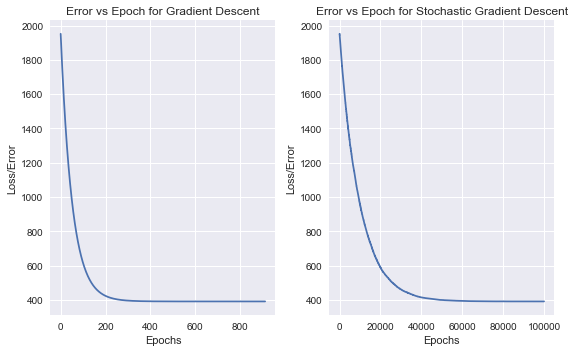

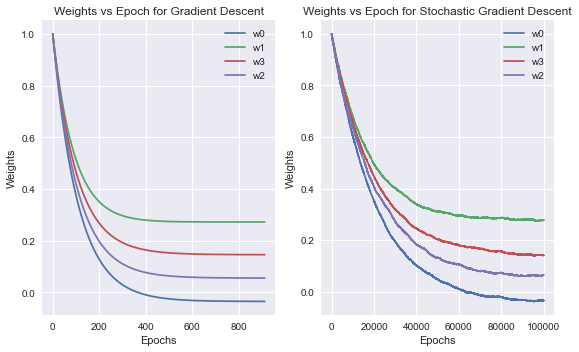

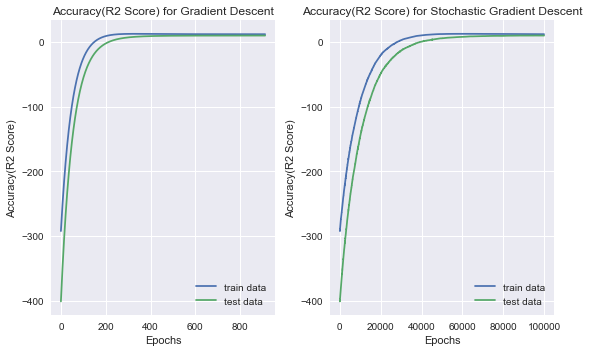

Time taken is:  77.31547212600708
END


In [19]:
main(EachModel=True,Summary=True,Graphs=True,LossAfterInterval=True)
print('END')